# Pima Indians Diabetes - Binary Classification

A project with an aim to practice ML modelling of binary classification

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age', 'Target']
data = pd.read_csv('pima-indians-diabetes.csv', names=columns, index_col=False)

In [96]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Target         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [98]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


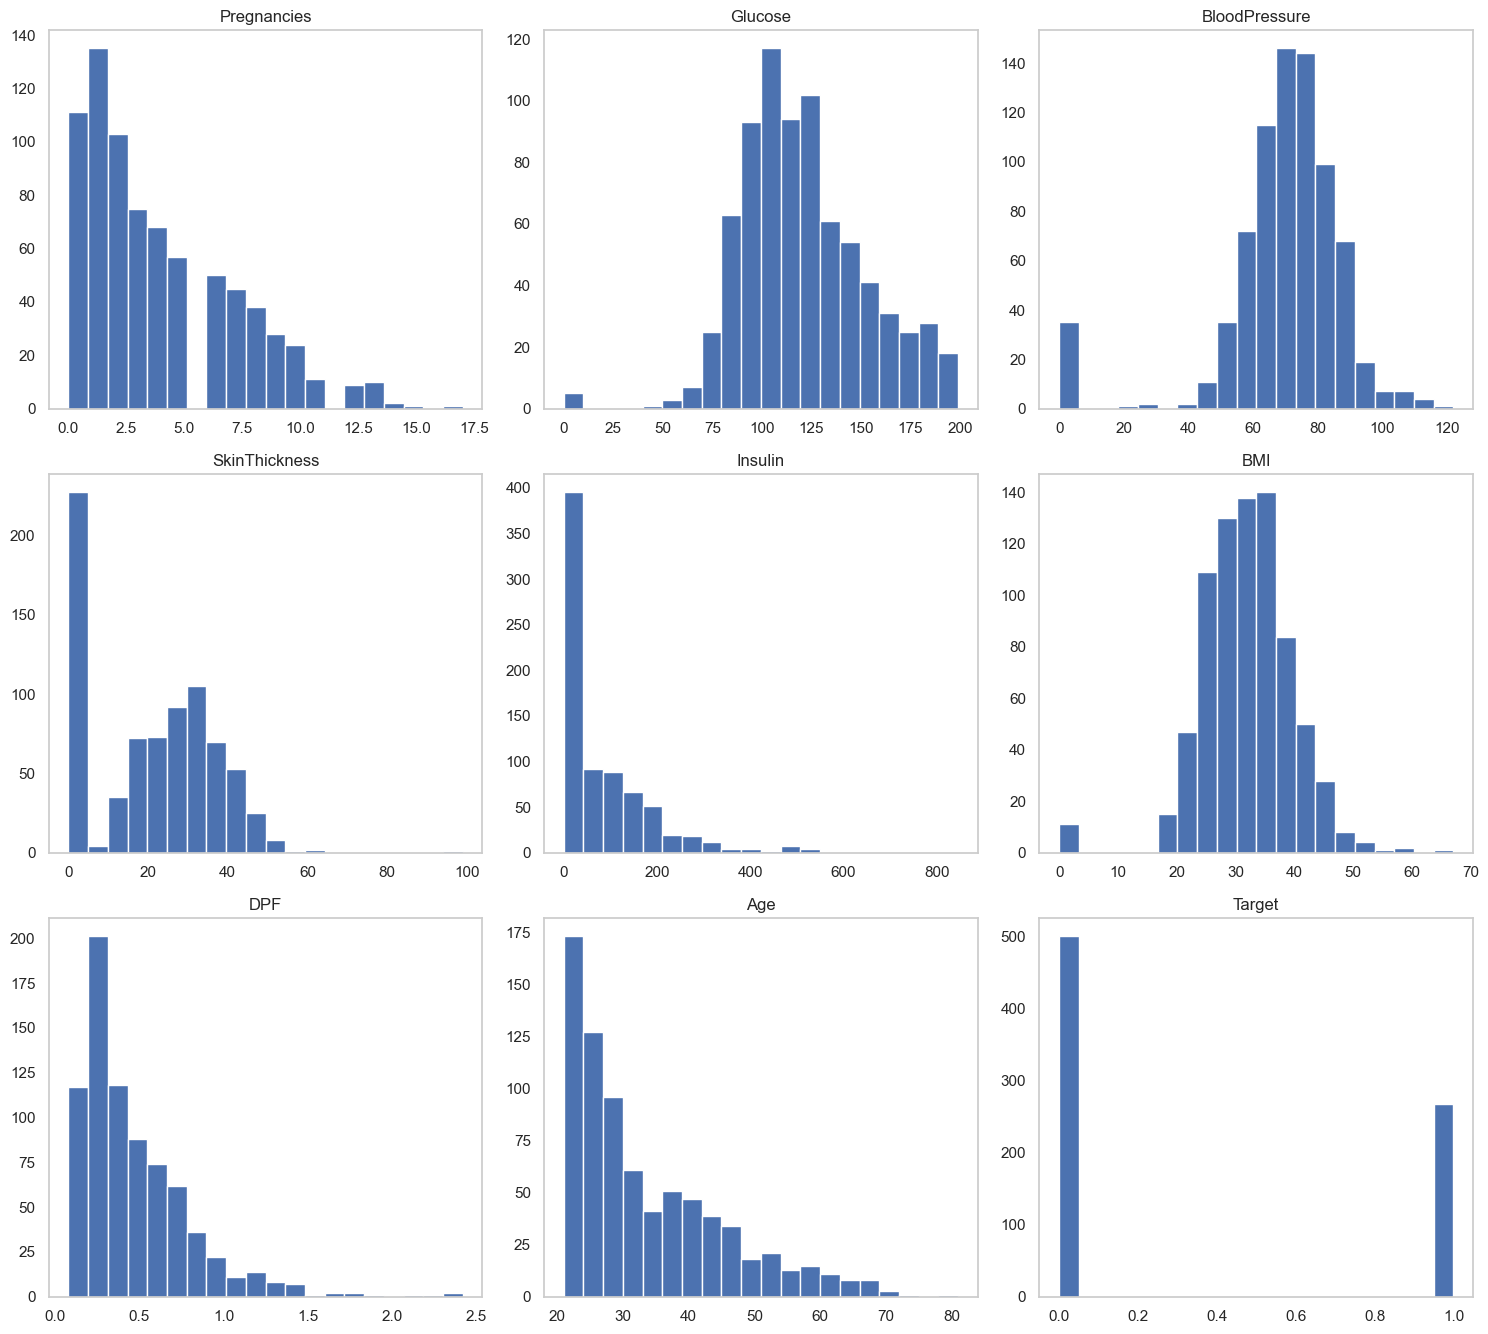

In [99]:
fig = data.hist(figsize=(10,9), bins=20, grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

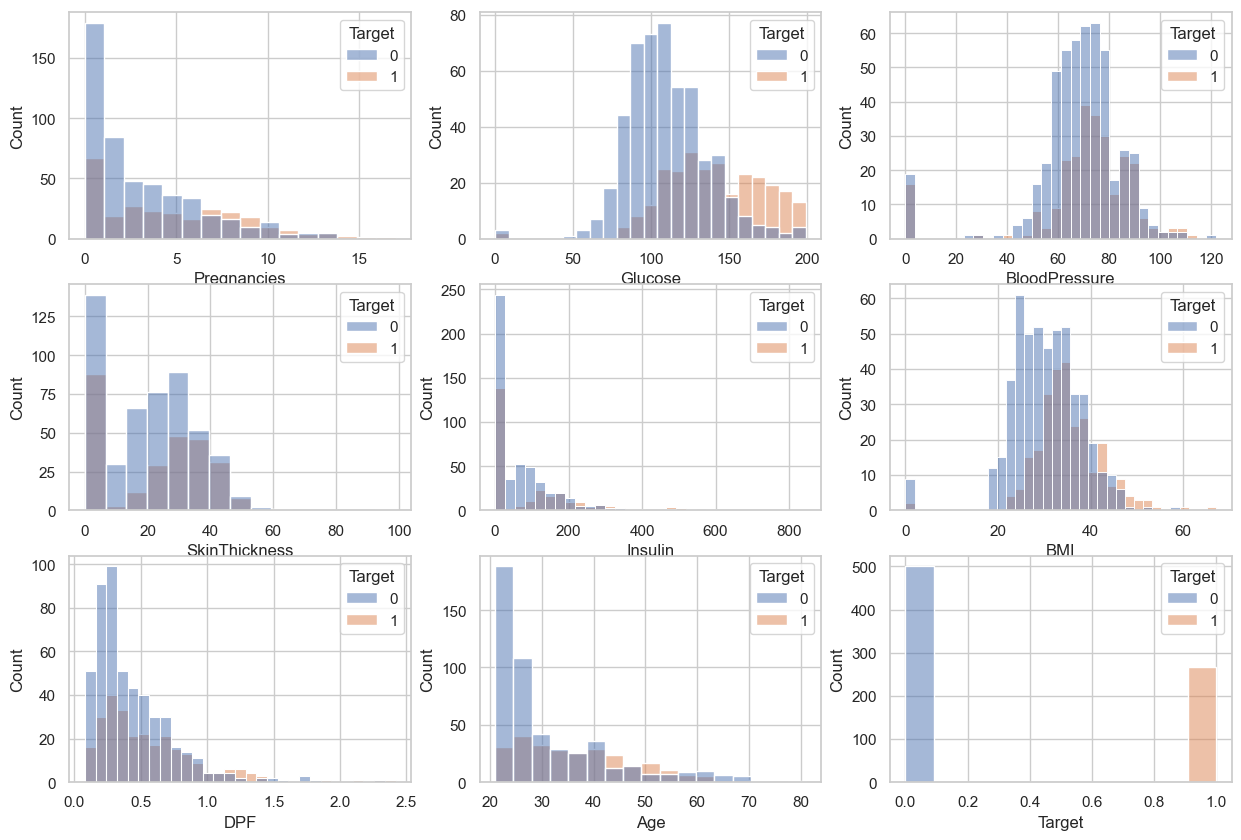

In [100]:
fig = plt.figure(figsize=(15,10))
for col, i in zip(columns, range(1,len(columns)+1)):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=col, hue='Target')

<Axes: >

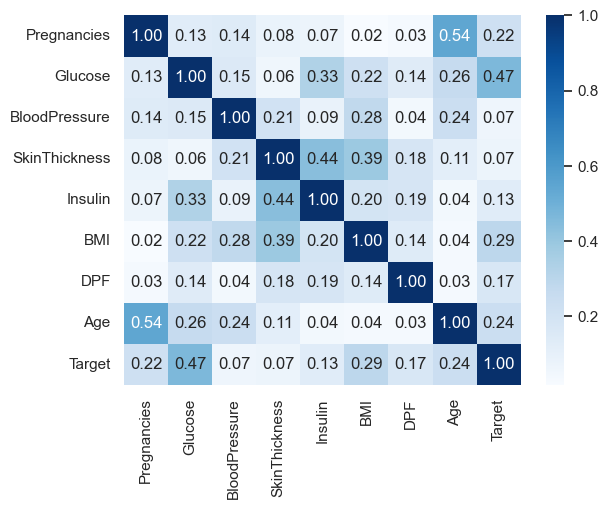

In [101]:
corr = abs(data.corr())
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')

## Data Transformation

### Zero values

Columns 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI' have zero values that are not correct. We will substitute them by mean values calculated separatelly for two target groups.

In [102]:
data.groupby('Target').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
Target,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [103]:
data_with_diabetes = data[data['Target']==1]
data_without_diabetes = data[data['Target']==0]
col_for_imputing = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

In [104]:
from sklearn.impute import SimpleImputer

In [105]:
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(data_with_diabetes[col_for_imputing])
imputed_array = imputer.transform(data_with_diabetes[col_for_imputing])
imputed_data = pd.DataFrame(imputed_array, columns = col_for_imputing, index = data_with_diabetes.index)
data_with_diabetes_imputed = data_with_diabetes.copy()
data_with_diabetes_imputed[col_for_imputing] = imputed_data

In [106]:
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(data_without_diabetes[col_for_imputing])
imputed_array = imputer.transform(data_without_diabetes[col_for_imputing])
imputed_data = pd.DataFrame(imputed_array, columns = col_for_imputing, index = data_without_diabetes.index)
data_without_diabetes_imputed = data_without_diabetes.copy()
data_without_diabetes_imputed[col_for_imputing] = imputed_data

In [107]:
data_imputed = pd.concat([data_with_diabetes_imputed, data_without_diabetes_imputed])

### Log transformation

Columns 'Pregnancies', 'DiabetesPedigreeFunction', 'Age' are right skewed. We will apply log-transormation to them in order to make them more similar to normal distribution.

In [110]:
columns_for_log = ['Pregnancies', 'DPF', 'Age']
data_log = data_imputed.copy()

In [111]:
np.seterr(divide = 'ignore')
for col in columns_for_log:
    data_log[col + '_log'] = np.where(data_log[col]>0, np.log(data_log[col]), 0)

In [112]:
data_log.drop(columns_for_log, axis=1, inplace=True)

In [113]:
columns_new = ['Pregnancies_log', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF_log', 'Age_log', 'Target']
data_log = data_log[columns_new]

In [114]:
data_log.head()

,Pregnancies_log,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF_log,Age_log,Target
0,1.791759,148.0,72.0,35.0,0,33.6,-0.466809,3.912023,1
2,2.079442,183.0,64.0,33.0,0,23.3,-0.397497,3.465736,1
4,0.000000,137.0,40.0,35.0,168,43.1,0.827678,3.496508,1
6,1.098612,78.0,50.0,32.0,88,31.0,-1.394327,3.258097,1
8,0.693147,197.0,70.0,45.0,543,30.5,-1.845160,3.970292,1


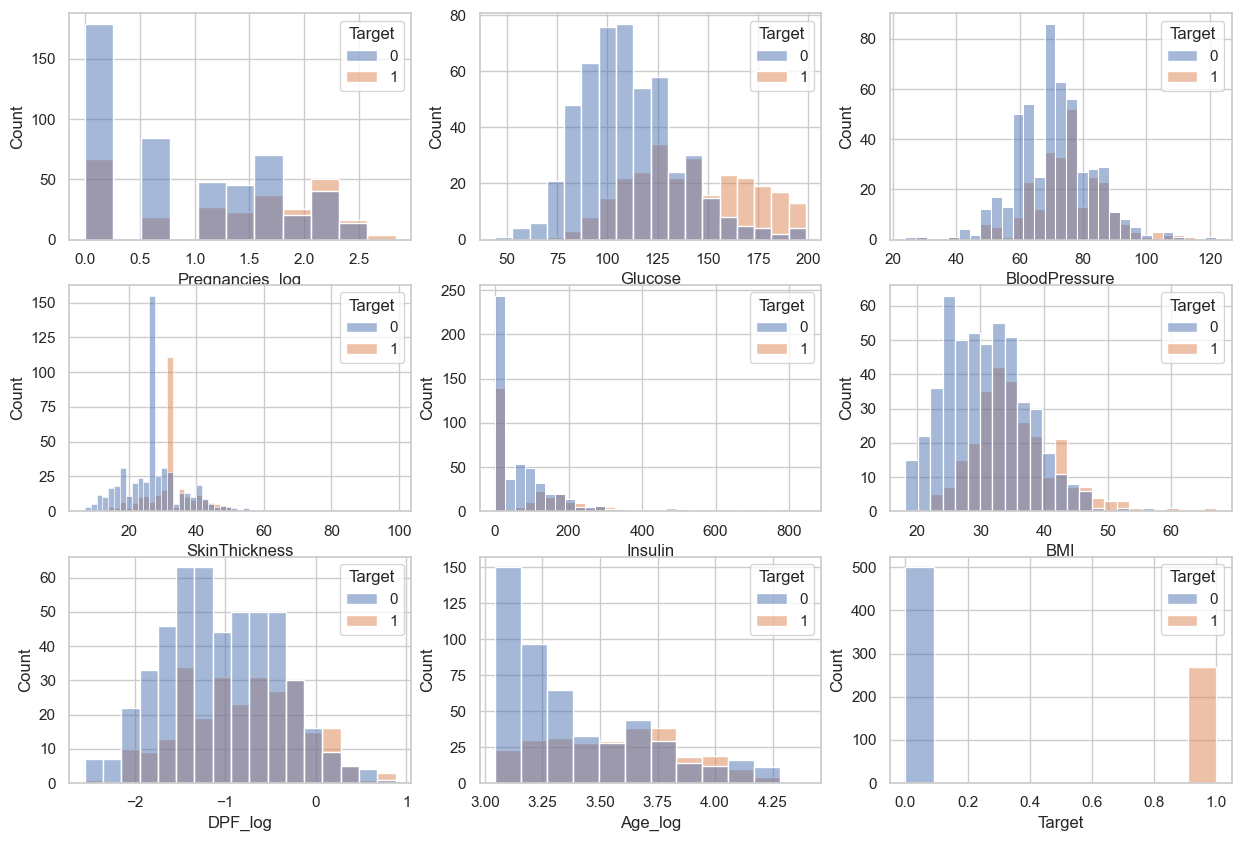

In [115]:
fig = plt.figure(figsize=(15,10))
for col, i in zip(columns_new, range(1,len(columns_new)+1)):
    plt.subplot(3, 3, i)
    sns.histplot(data=data_log, x=col, hue='Target')

We can also check that correlation has improved:

In [118]:
new_corr = abs(data_log.corr())
new_corr['Target']

Pregnancies_log    0.211211
Glucose            0.495954
BloodPressure      0.175087
SkinThickness      0.308094
Insulin            0.130548
BMI                0.315271
DPF_log            0.180612
Age_log            0.275077
Target             1.000000
Name: Target, dtype: float64

In [119]:
# correlation of the parameters with the Target column before transformation:
corr['Target']

Pregnancies      0.221898
Glucose          0.466581
BloodPressure    0.065068
SkinThickness    0.074752
Insulin          0.130548
BMI              0.292695
DPF              0.173844
Age              0.238356
Target           1.000000
Name: Target, dtype: float64

## Train and Test Split

In [23]:
X = data_log.drop(columns=['Target'], axis=1)
y = data_log['Target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [26]:
y_train.value_counts(normalize=True)

0    0.651466
1    0.348534
Name: Target, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: Target, dtype: float64

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Spot Checking Algorithms

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
models = [
    ('lr', LogisticRegression(max_iter=400)),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('rf', RandomForestClassifier(n_estimators=10, max_depth=5)),
    ('knn', KNeighborsClassifier()),
    ('svm_l', SVC(kernel = 'linear')),
    ('svm_r', SVC(kernel = 'rbf')),
    ('nb', GaussianNB()),
    ('sgd', SGDClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('lda', LinearDiscriminantAnalysis())
    ]

In [31]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, KFold

In [46]:
seed = 4
models_scores = {}
scores = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring="accuracy", )
    models_scores[name] = cv_results.mean()
    scores.append(cv_results)
    names.append(name)
    msg = "%s: %.2f (%.2f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

lr: 0.76 (0.08)
dt: 0.80 (0.05)
rf: 0.82 (0.05)
knn: 0.72 (0.06)
svm_l: 0.76 (0.08)
svm_r: 0.76 (0.05)
nb: 0.75 (0.08)
sgd: 0.73 (0.07)
gb: 0.82 (0.04)
lda: 0.77 (0.08)


In [47]:
accuracies = pd.DataFrame.from_dict(models_scores, orient = 'index', columns=['accuracy'])
accuracies.sort_values(by='accuracy', ascending=False)

,accuracy
gb,0.819302
rf,0.819223
dt,0.804548
lda,0.765442
svm_r,0.763908
svm_l,0.762189
lr,0.758990
nb,0.750740
sgd,0.733157
knn,0.721655


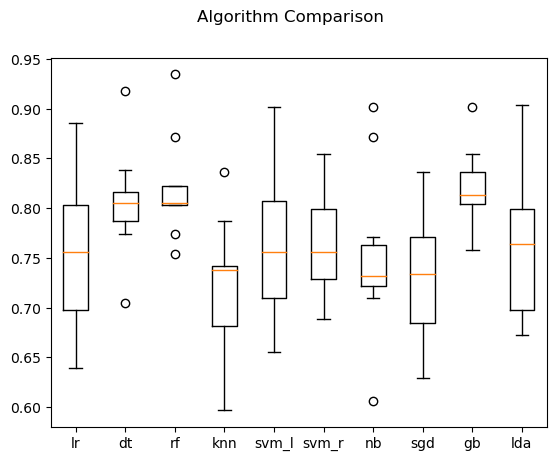

In [48]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

Best results are obtained with GradientBoostingClassifier, RandomForest and DecisionTree.

## Model Tuning

In [36]:
# Grid search for tuting parameters of the best models
from sklearn.model_selection import GridSearchCV

### Decision Tree

In [54]:
unpruned_tree = DecisionTreeClassifier(random_state=4)
cost_path = unpruned_tree.cost_complexity_pruning_path(X_train_scaled, y_train)
subtrees = []
alphas = cost_path.ccp_alphas
for alpha in alphas:
    subtree = DecisionTreeClassifier(random_state=4, ccp_alpha=alpha)
    subtree.fit(X_train_scaled, y_train)
    subtrees.append(subtree)
ccp_alphas_slice = alphas[-10:-3]
subtrees_slice = subtrees[-10:-3]
subtree_scores = [subtree.score(X_test_scaled, y_test) for subtree in subtrees_slice]
alpha_scores = tuple(zip(ccp_alphas_slice, subtree_scores))
print(max(alpha_scores, key=lambda x: x[1]))

(0.006492193642592389, 0.8376623376623377)


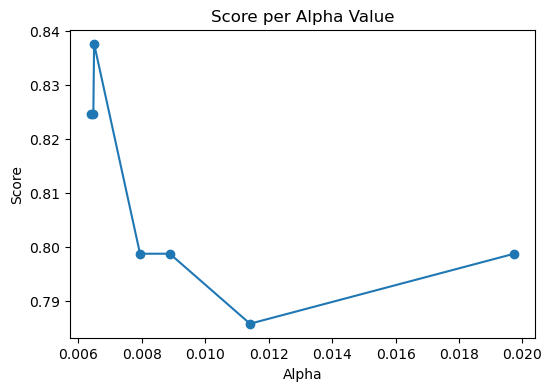

In [55]:
fig, ax = plt.subplots(figsize=[6, 4])
ax.set_xlabel('Alpha')
ax.set_ylabel('Score')
ax.set_title('Score per Alpha Value')
ax.plot(ccp_alphas_slice, subtree_scores, marker='o')
plt.show()

In [56]:
parameters = [{'max_depth': [5, 7, 9], 'min_samples_leaf': [3, 5, 7], 'ccp_alpha': [0.00649], 'criterion': ['gini', 'entropy', 'log_loss']}]
              
classifier = DecisionTreeClassifier(random_state=4)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train_scaled, y_train)
print('Best accuracy: ', grid_search.best_score_)
print('Best parameters: ', grid_search.best_params_)

Best accuracy:  0.8076414595452143
Best parameters:  {'ccp_alpha': 0.00649, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}


### Random Forest

In [57]:
parameters = [{'max_depth': [5, 7, 9], 'min_samples_leaf': [3, 5, 7], 'bootstrap': [True], 'oob_score': [True, False]},
             {'max_depth': [5, 7, 9], 'min_samples_leaf': [3, 5, 7], 'bootstrap': [False]}]
              
classifier = RandomForestClassifier(random_state=4)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train_scaled, y_train)
print('Best accuracy: ', grid_search.best_score_)
print('Best parameters: ', grid_search.best_params_)

Best accuracy:  0.8353516657852988
Best parameters:  {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 3, 'oob_score': True}


### Gradient Boosting

In [62]:
parameters = [{'learning_rate': [0.1, 0.5, 1], 'n_estimators': [100, 150, 200], 'max_depth': [3, 5, 7]}]
             
classifier = GradientBoostingClassifier(random_state=4)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train_scaled, y_train)
print('Best accuracy: ', grid_search.best_score_)
print('Best parameters: ', grid_search.best_params_)

Best accuracy:  0.8240084611316764
Best parameters:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 150}


The best result is obtained with Random Forest with parameters: bootstrap=True, oob_score=True, max_depth=7, min_samples_leaf=3

## Model Evaluation

In [65]:
model = RandomForestClassifier(bootstrap=True, oob_score=True, max_depth=7, min_samples_leaf=3, random_state=4)

### Confusion Matrix and Accuracy

In [64]:
from sklearn.metrics import confusion_matrix

In [81]:
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = model.score(X_test_scaled, y_test)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print('F1: ', round(f1, 2))
print('Accuracy: ', round(accuracy, 2))
print('Confusion matrix:\n',cm)

F1:  0.73
Accuracy:  0.83
Confusion matrix:
 [[92  8]
 [18 36]]


### Area under the ROC curve

In [70]:
from sklearn.model_selection import cross_val_score
metric='roc_auc'
folds = 10

scores = cross_val_score(model, X_train_scaled, y_train, scoring=metric, cv=folds, n_jobs=-1)
mean_score, std_score = np.mean(scores), np.std(scores)
print('Area under the ROC curve: %.3f (+/-%.3f)' % (mean_score, std_score))

Area under the ROC curve: 0.899 (+/-0.056)


In [ ]:
from sklearn.metrics import roc_curve

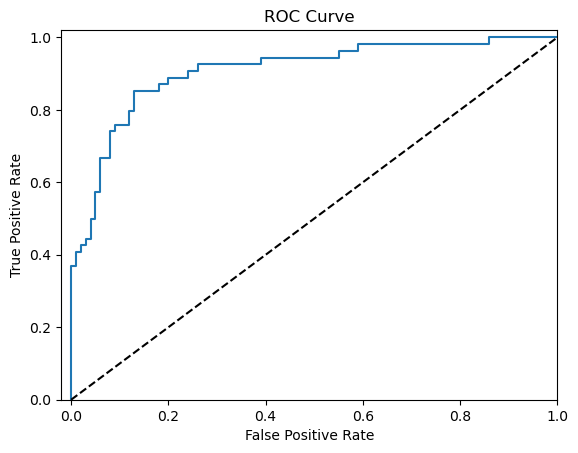

In [79]:
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])

### Classification Report

In [71]:
from sklearn.metrics import classification_report
model.fit(X_train_scaled, y_train)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       100
           1       0.82      0.67      0.73        54

    accuracy                           0.83       154
   macro avg       0.83      0.79      0.81       154
weighted avg       0.83      0.83      0.83       154



## Conclusion

The best results are obtained with the Random Forest model with parameters bootstrap=True, oob_score=True, max_depth=7, min_samples_leaf=3.
It has accuracy of 83% on the test set and 84% on the training set. 
Its F1-score equals to 73% and area under the ROC-curve is of 90%.
So the model performes rather well.